<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading the Dataset

In [2]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**1. DATA PREPROCESSING**

Checking for Missing Values

In [ ]:
#Finding number of missing values
data.isnull().sum().to_frame().rename(columns={0:"No. of Missing Values"})

,No. of Missing Values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


There are no missing values

Label Encoding Categorical Variables

In [3]:
from sklearn.preprocessing import LabelEncoder
data_cat = pd.DataFrame(data[['sex','smoker','region']])
le = LabelEncoder()
for col in data_cat.columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data_cat[col])

In [4]:
x = data.drop(columns=["charges"])
y = data["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

**2. Linear Regression Model**

Building and Fitting Linear Regression Model

In [5]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_test,y_test))

0.7417657216542766


In [ ]:
x_test.shape

(335, 6)

In [ ]:
y_test.shape

(335,)

Predicting the Linear Regression Model

In [8]:
y_pred = reg.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds.head()

,Actual,Predicted
474,25382.29700,34650.990960
333,11658.37915,12172.972442
531,14043.47670,14713.270323
372,7639.41745,10378.808520
503,32548.34050,26240.072249


**3. MODEL EVALUATION**


CALCULATING DIFFERENT METRICS TO TEST THE PERFORMANCE OF THE MODEL:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2) score
- Adjusted R-squared score
- Residual Sum of Squares (RSS)
- Explained Variance Score

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#MAE is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
mae = mean_absolute_error(y_test,y_pred)
#MSE measures the average of the squares of the errors
mse = mean_squared_error(y_test,y_pred)
#RMSE measures the average difference between values predicted by a model and the actual values
rmse = np.sqrt(mse)

In [10]:
print(f'The Mean Absolute error:{mae:.2f}')
print(f'The Mean Squared Error:{mse:.2f}')
print(f'The Root Mean Squared Error:{rmse:.2f}')

The Mean Absolute error:4284.85
The Mean Squared Error:36436076.08
The Root Mean Squared Error:6036.23


In [11]:
from sklearn.metrics import r2_score,explained_variance_score
r2 = r2_score(y_test,y_pred)
var = explained_variance_score(y_test,y_pred)
adj_r2 = 1-(1-reg.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#It is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable
print("The R-Squared value is ",r2)
#it is a modified version of r-squared that has been adjusted for the number of predictors in the model
print("The Adjusted R-Squared value is ",adj_r2)
#It explains the dispersion of errors of a given dataset
print("The Explained variance score is ", var)
#It is a key metric that gives a numerical representation of how well your regression model fits the data
print("Residual sum of squares is:"+str(np.sum(np.square(df_preds['Predicted']-df_preds['Actual']))))

The R-Squared value is  0.7417657216542766
The Adjusted R-Squared value is  0.7358293014624209
The Explained variance score is  0.7420821521457417
Residual sum of squares is:9764868389.26992


**4. FEATURE IMPORTANCE**

Feature: 0, Score: 255.06063
Feature: 1, Score: -356.64474
Feature: 2, Score: 362.01237
Feature: 3, Score: 505.76005
Feature: 4, Score: 23440.53228
Feature: 5, Score: -416.29838


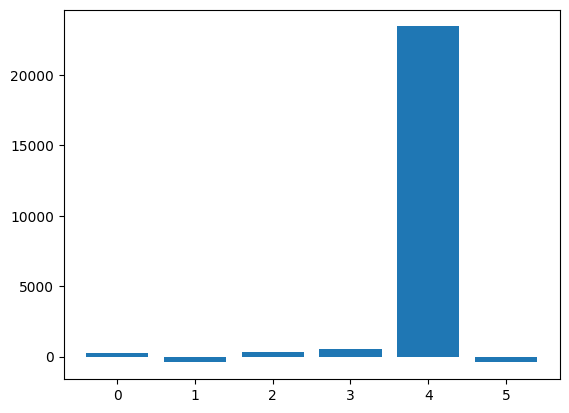

In [ ]:
importance = reg.coef_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' %(i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

**5. SCATTERPLOT VISUALIZATION**

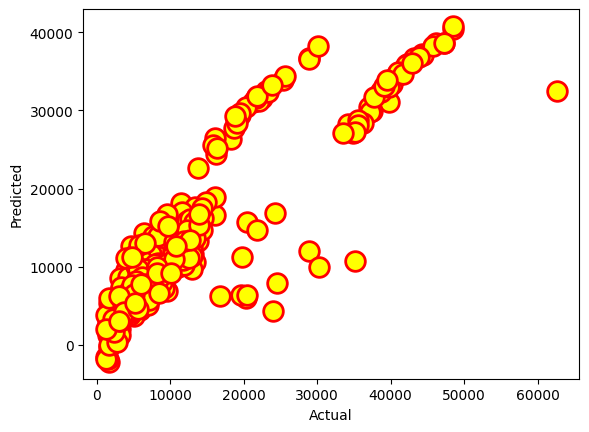

In [ ]:
plt.scatter(df_preds['Actual'],df_preds['Predicted'],c='yellow',linewidths=2,edgecolor='red',s=200)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**6. RECOMMENDATIONS**

Factors such as Age is contributing more to higher insurance costs. This will help enable insurers to identify customers who are at risk of lapsing and take appropriate action to prevent it. This will also help customers in reducing their insurance costs